## Demo for the function approximation using Genetic Programming

-  Demo 1 - we will try to aproximate a simple function f(x) = n^3

-  Demo 2 - we will try to aproximate a more complex function f(x) = sin(x) * (x)2

##### Importing the libraries.

In [1]:
from Population import Population
from Train import train
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Define the binary and unary functions to be use, function tree characteristics and evolutionary algorithm hyper-parameters.

In [2]:
BINARY_FUNCTIONS = ['+','-','*','/']
UNARY_FUNCTIONS = ['sin','cos','e^','ln','tg','tanh','abs']

LEAF_CONSTANT_PROB = 0.2
MAKE_LEAF_PROB = 0.6

TREE_DEPTH = 6
MAX_DEPTH = 20


POPULATION = 4000
EPOCH_COUNT = 4000
FEEDBACK_EPOCH = 500

#### Demo 1
##### Creating a dataset based on function 𝑓 (𝑥) = 𝑛3

In [3]:
f = lambda x: x**3

X = [[x] for x in np.arange(-10,10,0.01)]
Y = [f(x[0]) for x in X]

##### Creating the population.

In [4]:
population = Population(size=POPULATION,varCount=len(X[0]))

##### Training the population based on the X,Y dataset, for a set number of epochs.

In [5]:
train(population, EPOCH_COUNT, X,Y)

Evaluated chromosome 0.
Evaluated chromosome 500.
Evaluated chromosome 1000.
Evaluated chromosome 1500.
Evaluated chromosome 2000.
Evaluated chromosome 2500.
Evaluated chromosome 3000.
Evaluated chromosome 3500.
Epoch 0 genotype: ['*', 0, '*', 0, 0] loss: 4.534780620019787e-28
Epoch 500 genotype: ['*', 0, '*', 0, 0] loss: 4.534780620019787e-28
Epoch 1000 genotype: ['*', 0, '*', 0, 0] loss: 4.534780620019787e-28
Epoch 1500 genotype: ['*', 0, '*', 0, 0] loss: 4.534780620019787e-28
Epoch 2000 genotype: ['*', 0, '*', 0, 0] loss: 4.534780620019787e-28
Epoch 2500 genotype: ['*', 0, '*', 0, 0] loss: 4.534780620019787e-28
Epoch 3000 genotype: ['*', 0, '*', 0, 0] loss: 4.534780620019787e-28
Epoch 3500 genotype: ['*', 0, '*', 0, 0] loss: 4.534780620019787e-28


##### Checking the minimum error from the population on the dataset (the error of the fittest chromosome).
-  We observe that both the error, both the plot tell us that the function was wasy to replicate, since it was a basic function.

In [6]:
best = population.getBest()
best.eval(X,Y)
print("MSE on test : " + str(best.phenotype))

MSE on test : 4.534780620019787e-28


##### The original function and the predicted have overlapping graphs, since we got a perfect estimation.

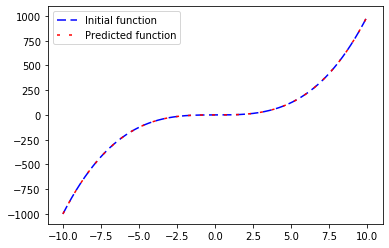

In [7]:
Ypred = [best.computeFunction(x)[0] for x in X]

plt.plot([x[0] for x in X], Y, c = 'b',dashes=[6, 3], label='Initial function')
plt.plot([x[0] for x in X], Ypred, c = 'r',dashes=[2,6], label = 'Predicted function')
plt.legend()
plt.show()

#### Demo 2
##### Creating a dataset based on function $f$$(x)$ = $\sin$$(x)$ $*$ $(x)$$/$$2$

In [8]:
f = lambda x: np.sin(x) * x/2

X = [[x] for x in np.arange(0,10,0.01)]
Y = [f(x[0]) for x in X]

##### Creating the population.

In [9]:
population = Population(size=POPULATION,varCount=len(X[0]))

##### Training the population based on the X,Y dataset, for a set number of epochs.

In [10]:
train(population, EPOCH_COUNT, X,Y)

Evaluated chromosome 0.
Evaluated chromosome 500.
Evaluated chromosome 1000.
Evaluated chromosome 1500.
Evaluated chromosome 2000.
Evaluated chromosome 2500.
Evaluated chromosome 3000.
Evaluated chromosome 3500.
Epoch 0 genotype: ['tg', 'sin', 0] loss: 0.6799457959679759
Epoch 500 genotype: ['tg', 'sin', 0] loss: 0.6799457959679759
Epoch 1000 genotype: ['tg', 'sin', 0] loss: 0.6799457959679759
Epoch 1500 genotype: ['tg', 'sin', 0] loss: 0.6799457959679759
Epoch 2000 genotype: ['tg', 'sin', 0] loss: 0.6799457959679759
Epoch 2500 genotype: ['tg', 'sin', 0] loss: 0.6799457959679759
Epoch 3000 genotype: ['tg', 'sin', 0] loss: 0.6799457959679759
Epoch 3500 genotype: ['tg', 'sin', 0] loss: 0.6799457959679759


##### Checking the minimum error from the population on the dataset (the error of the fittest chromosome).
-  We observe that both the error, both the plot tell us that, since the function was a more complex one, it wasn't that easy to predict exactly.

In [11]:
best = population.getBest()
best.eval(X,Y)
print("MSE on test : " + str(best.phenotype))

MSE on test : 0.49762331932917003


##### The original function and the predicted have the same tendencies, being quite a good estimation for only 4000 epochs.

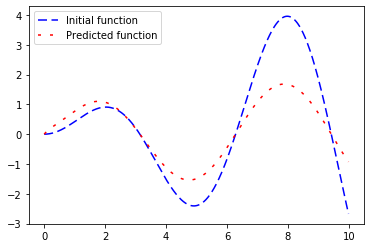

In [12]:
Ypred = [best.computeFunction(x)[0] for x in X]

plt.plot([x[0] for x in X], Y, c = 'b',dashes=[6, 3], label='Initial function')
plt.plot([x[0] for x in X], Ypred, c = 'r',dashes=[2,6], label = 'Predicted function')
plt.legend()
plt.show()